In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,r2_score,f1_score
import seaborn as sns


In [2]:
titanic_train=pd.read_csv(r'C:/Users/dell/Downloads/train.csv')
titanic_test=pd.read_csv(r'C:/Users/dell/Downloads/test.csv')
titanic_train.head(5)
titanic_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
titanic_train.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
titanic_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
titanic_train.shape

(891, 12)

In [6]:
titanic_test.shape

(418, 11)

In [7]:
titanic_train.Age.loc[titanic_train.Age.isna()] = titanic_train.Age.mean()


C:\Users\dell\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [9]:
titanic_test.Age.loc[titanic_test.Age.isna()] = titanic_test.Age.mean()

In [10]:
titanic_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
titanic_test.Embarked.loc[titanic_test.Embarked.isna()] = 'S'

In [12]:
titanic_train.Embarked.loc[titanic_train.Embarked.isna()] = 'S'

In [13]:
titanic_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [14]:
titanic_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [15]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
titanic_train.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [18]:
titanic_train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
5,6,0,3,male,29.699118,0,0,8.4583,Q
6,7,0,1,male,54.000000,0,0,51.8625,S
7,8,0,3,male,2.000000,3,1,21.0750,S
8,9,1,3,female,27.000000,0,2,11.1333,S
9,10,1,2,female,14.000000,1,0,30.0708,C


In [19]:
titanic_test.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [20]:
titanic_test.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
5,897,3,male,14.0,0,0,9.2250,S
6,898,3,female,30.0,0,0,7.6292,Q
7,899,2,male,26.0,1,1,29.0000,S
8,900,3,female,18.0,0,0,7.2292,C
9,901,3,male,21.0,2,0,24.1500,S


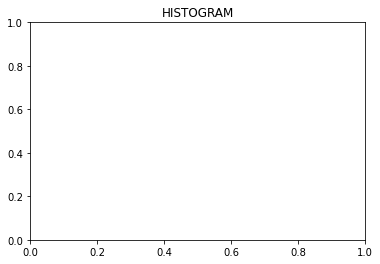

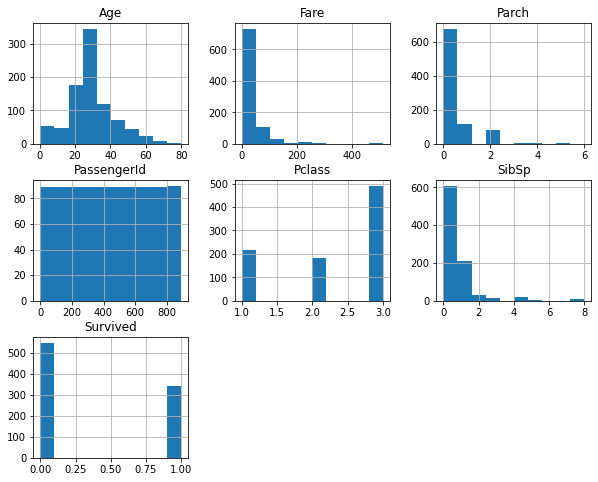

In [21]:
plt.title("HISTOGRAM")
titanic_train.hist(figsize=(10,8))
plt.show()

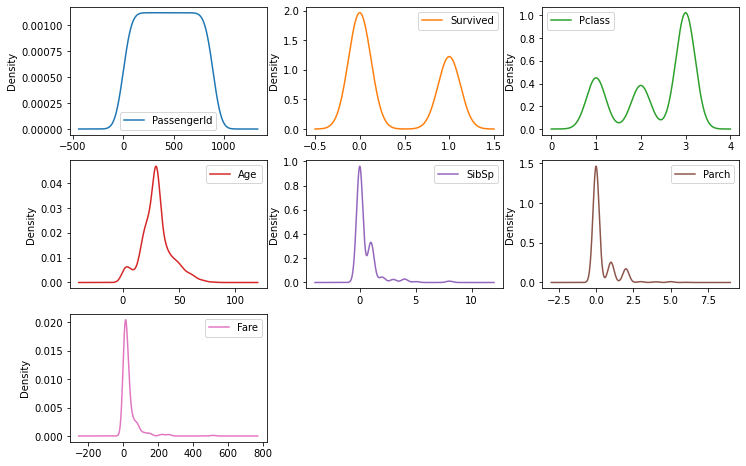

In [22]:
titanic_train.plot(kind='density',layout=(3,3),subplots=True,sharex=False,figsize=(12,8))
plt.show()

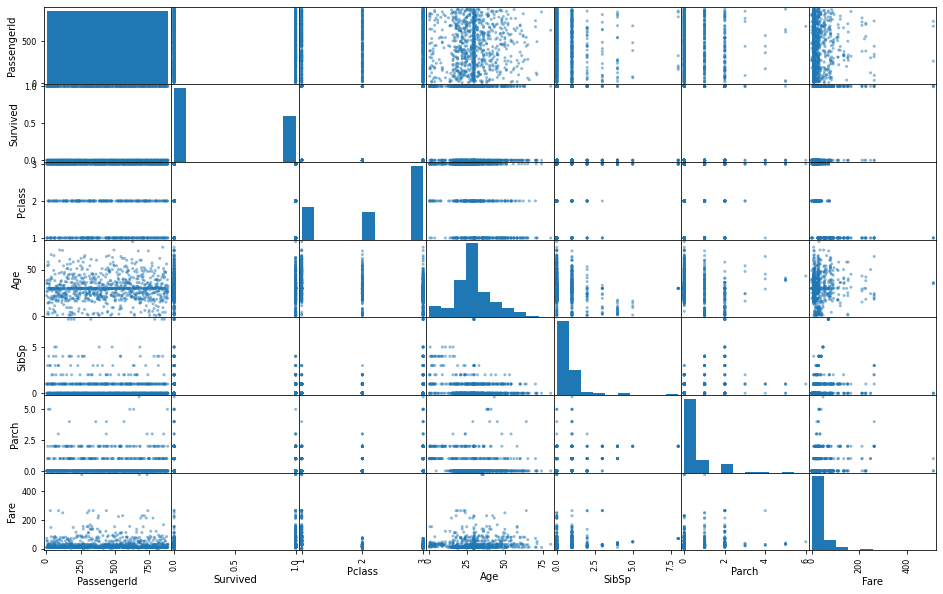

In [23]:
from pandas.plotting import scatter_matrix
scatter_matrix(titanic_train,figsize=(16,10))
plt.show()

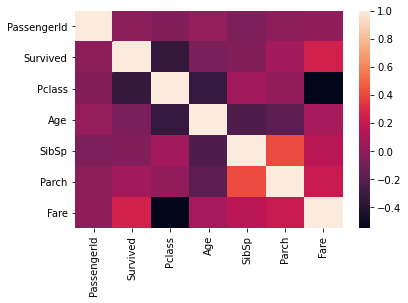

In [24]:
sns.heatmap(titanic_train.corr())


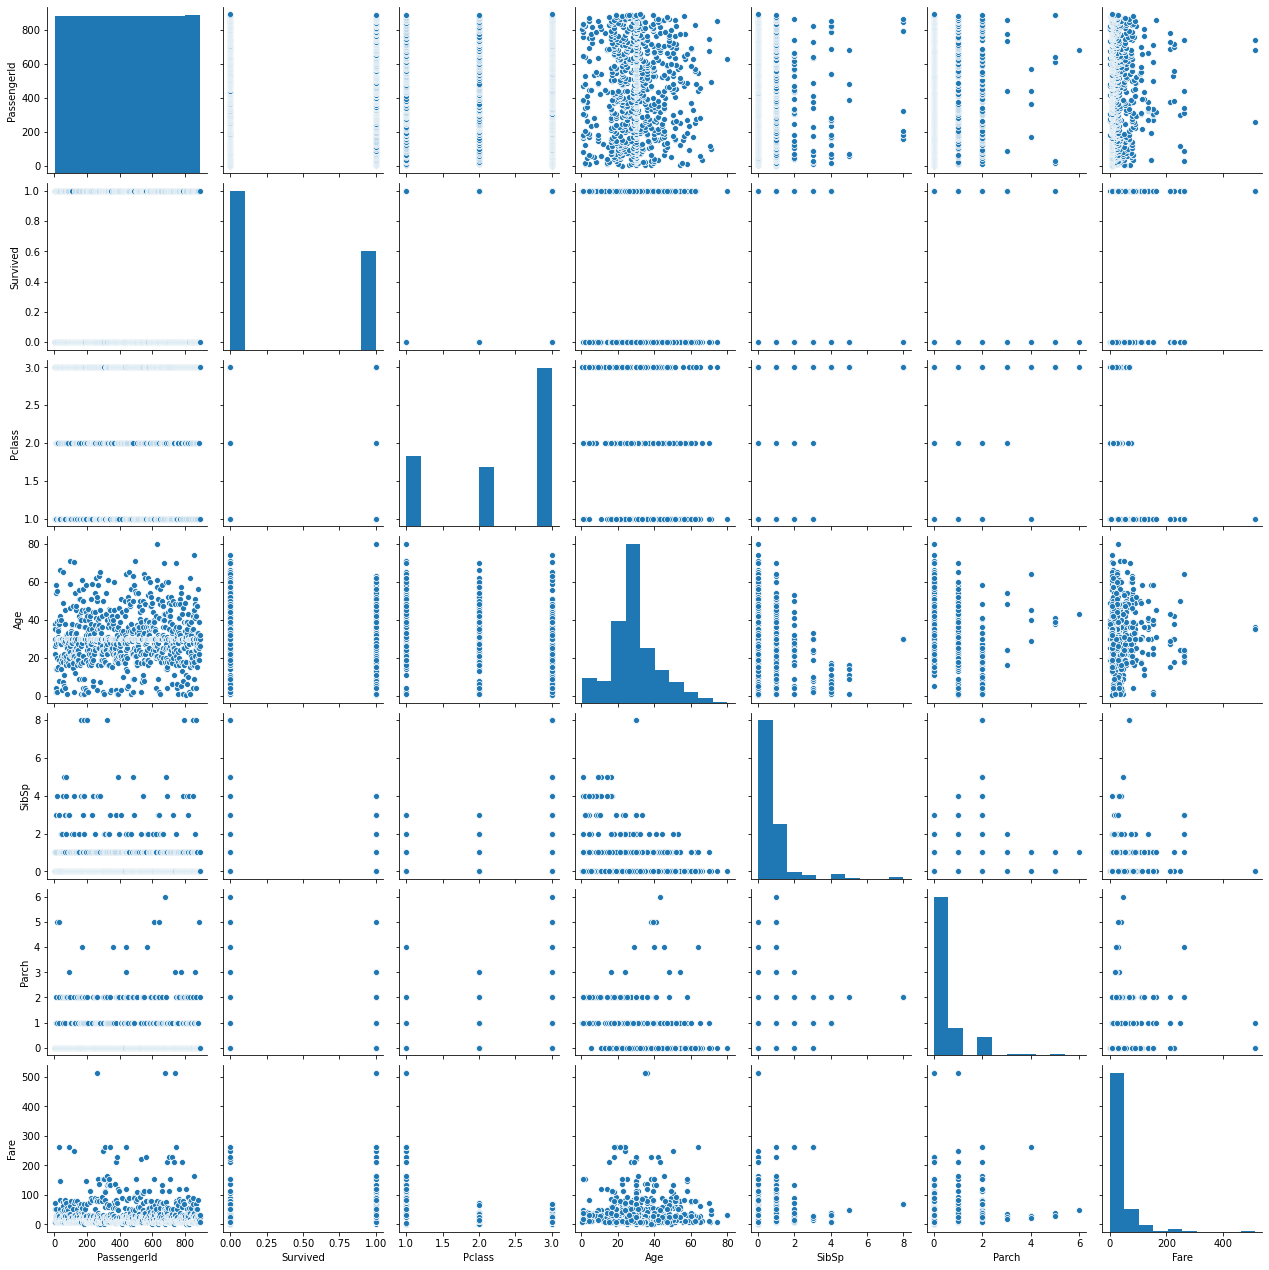

In [25]:
sns.pairplot(titanic_train)


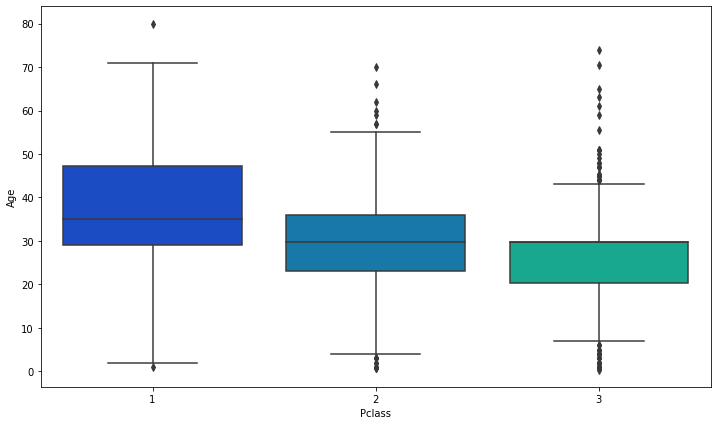

In [26]:
#box plot 
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=titanic_train,palette='winter')


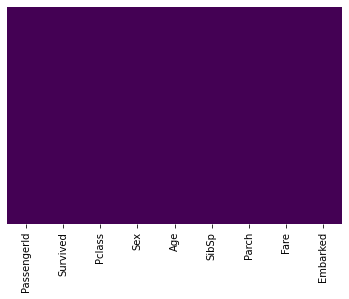

In [27]:
sns.heatmap(titanic_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [28]:
titanic_train.dropna(inplace=True)

In [29]:
titanic_test.dropna(inplace=True)

In [30]:
titanic_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [31]:
titanic_test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [32]:
titanic_train.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
5,6,0,3,male,29.699118,0,0,8.4583,Q
6,7,0,1,male,54.000000,0,0,51.8625,S
7,8,0,3,male,2.000000,3,1,21.0750,S
8,9,1,3,female,27.000000,0,2,11.1333,S
9,10,1,2,female,14.000000,1,0,30.0708,C


In [33]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 109.6+ KB


In [34]:
pd.get_dummies(titanic_train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [35]:
sex = pd.get_dummies(titanic_train['Sex'],drop_first=True)
embark = pd.get_dummies(titanic_train['Embarked'],drop_first=True)


In [36]:
titanic_train.drop(['Sex','Embarked'],axis=1,inplace=True)
titanic_train.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.000000,1,0,7.2500
1,2,1,1,38.000000,1,0,71.2833
2,3,1,3,26.000000,0,0,7.9250
3,4,1,1,35.000000,1,0,53.1000
4,5,0,3,35.000000,0,0,8.0500
5,6,0,3,29.699118,0,0,8.4583
6,7,0,1,54.000000,0,0,51.8625
7,8,0,3,2.000000,3,1,21.0750
8,9,1,3,27.000000,0,2,11.1333
9,10,1,2,14.000000,1,0,30.0708


In [37]:
titanic_train = pd.concat([titanic_train,sex,embark],axis=1)
titanic_train.head(5)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [38]:
pd.get_dummies(titanic_test['Embarked'],drop_first=True).head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [39]:
sexx = pd.get_dummies(titanic_test['Sex'],drop_first=True)
embarkk = pd.get_dummies(titanic_test['Embarked'],drop_first=True)


In [40]:
titanic_test.drop(['Sex','Embarked'],axis=1,inplace=True)
titanic_test.head(10)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875
5,897,3,14.0,0,0,9.2250
6,898,3,30.0,0,0,7.6292
7,899,2,26.0,1,1,29.0000
8,900,3,18.0,0,0,7.2292
9,901,3,21.0,2,0,24.1500


In [42]:
titanic_test = pd.concat([titanic_test,sexx,embarkk],axis=1)
titanic_test.head(5)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [43]:
#building a logistic reasoning model
X = titanic_train.drop('Survived',axis=1)
y= titanic_train.Survived


In [46]:
X.head(5)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [47]:
titanic_test.head(5)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [48]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=0,stratify=y)
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)
print("accuracy score : ",accuracy_score(y_test,y_pred))


accuracy score :  0.7668161434977578


C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
#evaluating logistic regression model
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_pred)

array([[117,  20],
       [ 32,  54]], dtype=int64)

In [50]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0], dtype=int64)

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       137
           1       0.73      0.63      0.68        86

    accuracy                           0.77       223
   macro avg       0.76      0.74      0.75       223
weighted avg       0.76      0.77      0.76       223



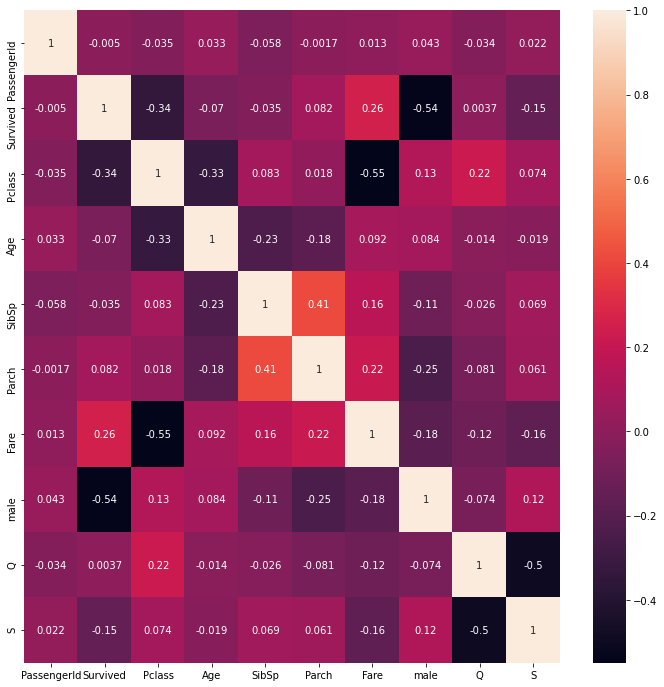

In [52]:
plt.figure(figsize=(12,12))
sns.heatmap(titanic_train.corr(),annot=True)


In [53]:
from sklearn.feature_selection import SelectKBest,chi2
model2=SelectKBest(score_func=chi2,k=4)
pred=model2.fit(X,y)
print(pred.scores_)

[3.31293407e+00 3.08736994e+01 2.46879258e+01 2.58186538e+00
 1.00974991e+01 4.51831909e+03 9.27024470e+01 1.08467891e-02
 5.48920482e+00]


In [54]:
pred.scores_.mean()

520.897279223468

In [55]:
from sklearn.feature_selection import RFE
model3=RFE(model1,4)
model3.fit(X,y)
pred2=model3.transform(X)
print(pred2)


C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iter

[[3. 1. 1. 1.]
 [1. 1. 0. 0.]
 [3. 0. 0. 1.]
 ...
 [3. 1. 0. 1.]
 [1. 0. 1. 0.]
 [3. 0. 1. 0.]]


In [56]:
from sklearn.neighbors import KNeighborsClassifier
model4=KNeighborsClassifier(n_neighbors=10)
model4.fit(X_train,y_train)
ypred=model4.predict(X_test)
print("Accuracy score : ",accuracy_score(y_test,ypred))


Accuracy score :  0.6457399103139013


In [57]:
from sklearn.svm import SVC
model5=SVC()
model5.fit(X_train,y_train)
ypred1=model5.predict(X_test)
print("Accuracy score : ",accuracy_score(y_test,ypred1))


Accuracy score :  0.6367713004484304


In [58]:
confusion_matrix(y_test,ypred1)

array([[135,   2],
       [ 79,   7]], dtype=int64)

In [59]:
from sklearn.naive_bayes import GaussianNB
model6=GaussianNB()
model6.fit(X_train,y_train)
ypred2=model6.predict(X_test)
print("Accuracy score : ",accuracy_score(y_test,ypred2))


Accuracy score :  0.7982062780269058


In [60]:
confusion_matrix(y_test,ypred2)

array([[119,  18],
       [ 27,  59]], dtype=int64)

In [61]:
print(classification_report(y_test,ypred2))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       137
           1       0.77      0.69      0.72        86

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223



In [62]:
from sklearn.ensemble import RandomForestClassifier
model7=RandomForestClassifier(n_estimators=150,random_state=0)
model7.fit(X_train,y_train)
ypred3=model6.predict(X_test)
print("Accuracy score : ",accuracy_score(y_test,ypred3))


Accuracy score :  0.7982062780269058


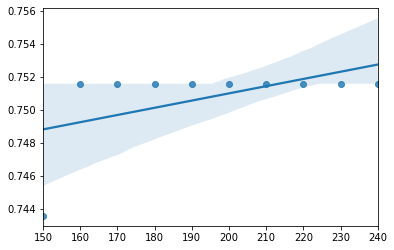

In [63]:
from sklearn.metrics import f1_score
sc = []
li = [x for x in range(150,250,10)]
for i in li:
    rr2 = RandomForestClassifier(n_estimators=i,random_state=0).fit(X_train,y_train)
    sc.append(f1_score(y_test,rr2.predict(X_test)))
sns.regplot(li,sc)


In [64]:
titanic_test.ndim

2

In [65]:
type(titanic_test)

pandas.core.frame.DataFrame

In [66]:
#predicting survival
prediction=model7.predict(titanic_test)
print(model7.score)
print(prediction)

<bound method ClassifierMixin.score of RandomForestClassifier(n_estimators=150, random_state=0)>
[0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0
 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1
 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0
 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1
 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0
 0 0 0 1 0 0 1 0 0 0]


In [67]:
print(model7.score)

<bound method ClassifierMixin.score of RandomForestClassifier(n_estimators=150, random_state=0)>


In [68]:
Final_solution = pd.DataFrame({'PassengerId': titanic_test.PassengerId, 'Survived': prediction})
Final_solution


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [70]:
Final_solution.to_csv("Survived.csv",index=False)

In [71]:
survived=pd.read_csv("Survived.csv")
survived.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
